# Proyecto Individual DPT

In [4]:
#---------------------------------------------------
# IMPORTANDO LIBRERIAS
#--------------------------------------------------

import numpy as np
import pandas as pd
import json as js
import matplotlib.pyplot as plt
import gzip
import shutil
import ast
from textblob import TextBlob
from dateutil import parser


In [13]:
#----------------------------------------------------
# FUNCIONES AUXILIARES PARA LEER DATOS
#----------------------------------------------------
def open_data(file_data):
    f = open(file_data, encoding= 'utf-8').read()
    data = f.split('\n')
    return data

def convertir_jason(datos):
    datos = js.loads(datos)
    return datos

def extraer(argumento):
    for key in argumento.keys():
        return argumento[key]

def eliminar(argumento):
    for key in argumento.keys():
        dicc = argumento.pop(key)
        return dicc

def abrir_archivo(archivo):
    data_list = []
    with open(archivo, 'rb') as file:
        for line in file:
            decode_line = line.decode('utf-8')
            data_list.append(ast.literal_eval(decode_line.strip()))
        return data_list



In [3]:
#----------------------------------------
# IMPORTANDO DATOS DE STEAM_GAMES
#----------------------------------------

df_steam_games = pd.read_json(gzip.open("./data_1/steam_games (1).json.gz"), lines= True)
df_steam_games.dropna(how='all', inplace=True)

df_steam_games.head()


,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140.0,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,0.0,643980.0,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,0.0,670290.0,Poolians.com
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,0.0,767400.0,彼岸领域
88314,None,None,Log Challenge,None,http://store.steampowered.com/app/773570/Log_C...,None,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,0.0,773570.0,None


In [15]:
#------------------------------------------
# IMPORTANDO DATOS DE USERS_REVIEWS
#------------------------------------------
with gzip.open("./data_1/user_reviews (2).json.gz",'rb') as f_input:
    with open("./data_1/user_reviews.json", 'wb') as f_output:
        shutil.copyfileobj(f_input, f_output)

data = abrir_archivo("./data_1/user_reviews.json")
df_reviews = pd.DataFrame(data)

df_reviews.head()

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


In [17]:
#-------------------------------------------
# IMPORTANDO DATOS DE USERS_ITEMS
#-------------------------------------------
with gzip.open("./data_1/users_items (1).json.gz",'rb') as f_input:
    with open("./data_1/users_items.json", 'wb') as f_output:
        shutil.copyfileobj(f_input, f_output)

data_2 = abrir_archivo("./data_1/users_items.json")
df_items = pd.DataFrame(data_2)
df_items.head()

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."


In [18]:
#--------------------------------------
# MOSTRANDO INFORMACION DE STEAM_GAMES
#--------------------------------------
df_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32135 entries, 88310 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24083 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  float64
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(2), object(11)
memory usage: 3.4+ MB


In [19]:
df_steam_games.describe()

,early_access,id
count,32135.000000,3.213300e+04
mean,0.060588,4.517574e+05
std,0.238577,1.827140e+05
min,0.000000,1.000000e+01
25%,0.000000,3.292800e+05
50%,0.000000,4.520600e+05
75%,0.000000,5.934000e+05
max,1.000000,2.028850e+06


In [20]:
df_steam_games.isna().sum()

publisher       8052
genres          3283
app_name           2
title           2050
url                0
release_date    2067
tags             163
reviews_url        2
specs            670
price           1377
early_access       0
id                 2
developer       3299
dtype: int64

In [21]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   25799 non-null  object
 1   user_url  25799 non-null  object
 2   reviews   25799 non-null  object
dtypes: object(3)
memory usage: 604.8+ KB


In [22]:
df_reviews.describe()

,user_id,user_url,reviews
count,25799,25799,25799
unique,25485,25485,25459
top,76561198027488037,http://steamcommunity.com/profiles/76561198027...,[]
freq,3,3,28


In [23]:
df_reviews.isna().sum()

user_id     0
user_url    0
reviews     0
dtype: int64

In [24]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      88310 non-null  object
 1   items_count  88310 non-null  int64 
 2   steam_id     88310 non-null  object
 3   user_url     88310 non-null  object
 4   items        88310 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


In [25]:
df_items.describe()

,items_count
count,88310.000000
mean,58.353629
std,122.312095
min,0.000000
25%,3.000000
50%,26.000000
75%,73.000000
max,7762.000000


In [26]:
df_items.isna().sum()

user_id        0
items_count    0
steam_id       0
user_url       0
items          0
dtype: int64

In [27]:
#--------------------------------------------------------
# FUNCION SENTIMENT_ANALYSIS
#--------------------------------------------------------
def sentiment_analysis(review):
    if isinstance(review, list) and len(review) > 0:
        text = review[0].get('review','')   #OBTENIENDO TEXTO
        sentiment = TextBlob(text).sentiment.polarity

        if sentiment < -0.2:
            return 0    # MALO
        elif sentiment >= -0.2 and sentiment <= 0.2:
            return 1    # NEUTRAL
        else:
            return 2    # POSITIVO
    else:
        return 1    # VALOR POR DEFAULT
    
#--------------------------------------------------------
# CREANDO COLUMNA SENTIMENT_ANALYSIS
#--------------------------------------------------------
df_reviews['sentiment_analysis'] = df_reviews['reviews'].apply(sentiment_analysis)
df_reviews.head()

,user_id,user_url,reviews,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2...",1
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014...",1
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',...",2
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2...",2
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',...",1


In [28]:
#-------------------------------------------------------
# DESANINANDO DATA_REVIEWS
#-------------------------------------------------------
data_reviews_expanded = []

for index, row in df_reviews.iterrows():
    user_id = row['user_id']
    user_url = row['user_url']
    sentiment_analysis_value = row['sentiment_analysis']
    reviews = row['reviews']

    for i in reviews: 
        new_row = {
            'user_id': user_id,
            'user_url': user_url,
            'reviews': reviews,
            'sentiment_analysis': sentiment_analysis_value,
            'funny': i.get('funny',''),
            'posted': i.get('posted',''),
            'last_edited': i.get('last_edited',''),
            'item_id': i.get('item_id',''),
            'helpful': i.get('helpful',''),
            'recommend': i.get('recommend',''),
            'review': i.get('review','')
        }

        data_reviews_expanded.append(new_row)

df_reviews_expanded = pd.DataFrame(data_reviews_expanded)
df_reviews_expanded.drop(['reviews', 'helpful', 'review', 'last_edited', 'funny'], axis=1, inplace=True) 
df_reviews_expanded.head()


,user_id,user_url,sentiment_analysis,posted,item_id,recommend
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1,"Posted November 5, 2011.",1250,True
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1,"Posted July 15, 2011.",22200,True
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1,"Posted April 21, 2011.",43110,True
3,js41637,http://steamcommunity.com/id/js41637,1,"Posted June 24, 2014.",251610,True
4,js41637,http://steamcommunity.com/id/js41637,1,"Posted September 8, 2013.",227300,True


In [29]:
#---------------------------------------------
# DANDO FORMATO A LA FECHA
#---------------------------------------------
def format_fecha(fecha):
    try:
        return parser.parse(fecha.replace('Posted ',''), fuzzy = True)
    except ValueError:
        return None
    
df_reviews_expanded['posted'] = df_reviews_expanded['posted'].apply(format_fecha)
df_reviews_expanded = df_reviews_expanded.dropna(subset=['posted'])
df_reviews_expanded

,user_id,user_url,sentiment_analysis,posted,item_id,recommend
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1,2011-11-05,1250,True
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1,2011-07-15,22200,True
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1,2011-04-21,43110,True
3,js41637,http://steamcommunity.com/id/js41637,1,2014-06-24,251610,True
4,js41637,http://steamcommunity.com/id/js41637,1,2013-09-08,227300,True
...,...,...,...,...,...,...
59300,76561198312638244,http://steamcommunity.com/profiles/76561198312...,2,2024-07-10,70,True
59301,76561198312638244,http://steamcommunity.com/profiles/76561198312...,2,2024-07-08,362890,True
59302,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,1,2024-07-03,273110,True
59303,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,1,2024-07-20,730,True


In [30]:
#---------------------------------------------
# DESANINANDO USERS_ITEMS
#---------------------------------------------
data_items_expanded = []

for index, row in df_items.iterrows():
    user_id = row['user_id']
    steam_id = row['steam_id']
    user_url = row['user_url']

    for item in row['items']:
        new_row = {
            'user_id': user_id,
            'steam_id': steam_id,
            'user_url': user_url,
            'item_id': item['item_id'],
            'item_name': item['item_name'],
            'playtime_forever': item['playtime_forever'],
            'playtime_2weeks': item['playtime_2weeks']
        }

        data_items_expanded.append(new_row)

df_items_expanded = pd.DataFrame(data_items_expanded)

In [31]:
df_items_expanded.head()

,user_id,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6,0
1,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,20,Team Fortress Classic,0,0
2,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,30,Day of Defeat,7,0
3,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,40,Deathmatch Classic,0,0
4,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,50,Half-Life: Opposing Force,0,0


In [32]:
df_steam_games['id'] = df_steam_games['id'].fillna(0).astype(int)   
df_steam_games['id'] = df_steam_games['id'].astype(int)

In [33]:
df_steam_games.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,0.0,643980,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,0.0,670290,Poolians.com
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,0.0,767400,彼岸领域
88314,None,None,Log Challenge,None,http://store.steampowered.com/app/773570/Log_C...,None,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,0.0,773570,None


In [34]:
#------------------------------------------------
# GUARDANDO LOS DATOS EN FORMATO CSV
#------------------------------------------------
df_steam_games.to_csv('./steam_games.csv', index= False)
df_reviews_expanded.to_csv('./reviews.csv', index= False)
df_items_expanded.to_csv('./items.csv', index= False)

In [35]:

#-----------------------------------------------
# LEYENDO NUEVOS ARCHIVOS
#-----------------------------------------------
df_steam = pd.read_csv('./steam_games.csv')
df_reviews = pd.read_csv('./reviews.csv')
df_items = pd.read_csv('./items.csv')

In [36]:
df_steam.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,0.0,761140,Kotoshiro
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,0.0,643980,Secret Level SRL
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,0.0,670290,Poolians.com
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,0.0,767400,彼岸领域
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"['Action', 'Indie', 'Casual', 'Sports']",http://steamcommunity.com/app/773570/reviews/?...,"['Single-player', 'Full controller support', '...",2.99,0.0,773570,NaN


In [37]:
df_reviews.head()

,user_id,user_url,sentiment_analysis,posted,item_id,recommend
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1,2011-11-05,1250,True
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1,2011-07-15,22200,True
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1,2011-04-21,43110,True
3,js41637,http://steamcommunity.com/id/js41637,1,2014-06-24,251610,True
4,js41637,http://steamcommunity.com/id/js41637,1,2013-09-08,227300,True


In [38]:
df_items.head()

,user_id,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6,0
1,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,20,Team Fortress Classic,0,0
2,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,30,Day of Defeat,7,0
3,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,40,Deathmatch Classic,0,0
4,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,50,Half-Life: Opposing Force,0,0


In [39]:
#------------------------------------------------
# ANALISIS EXPLORATORIO DE LOS DATOS
#------------------------------------------------
df_reviews_recommend = df_reviews[df_reviews['recommend']]
recommend_item = df_reviews_recommend.groupby('item_id')['recommend'].count().reset_index()
recommend_item = recommend_item.sort_values(by = 'recommend', ascending = False)

top_3 = recommend_item.head(3)
top_3_recommend = pd.merge(top_3, df_steam[['id', 'app_name']], left_on= 'item_id', right_on= 'id', how= 'left')

top_3_recommend

,item_id,recommend,id,app_name
0,440,3611,440,Team Fortress 2
1,730,3478,730,Counter-Strike: Global Offensive
2,4000,1685,4000,Garry's Mod


In [40]:
#---------------------------------------
# JUEGOS CON MAYOR TIEMPO DE JUEGO.
#---------------------------------------
top_playtime = df_items.sort_values(by= 'playtime_forever', ascending= False).head(10)
top_playtime

,user_id,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
587715,wolop,76561197970687008,http://steamcommunity.com/id/wolop,4000,Garry's Mod,642773,7299
2499068,Evilutional,76561198061797577,http://steamcommunity.com/id/Evilutional,212200,Mabinogi,635295,0
4075729,76561198019826668,76561198019826668,http://steamcommunity.com/profiles/76561198019...,42710,Call of Duty: Black Ops - Multiplayer,632452,8126
1495340,76561198039832932,76561198039832932,http://steamcommunity.com/profiles/76561198039...,4000,Garry's Mod,613411,588
1836985,tsunamitad,76561198019093186,http://steamcommunity.com/id/tsunamitad,72200,Universe Sandbox,600068,0
236899,jimmynoe,76561198028314084,http://steamcommunity.com/id/jimmynoe,4000,Garry's Mod,551719,0
1928125,shinomegami,76561198034699157,http://steamcommunity.com/id/shinomegami,8500,EVE Online,530882,0
2905355,lildoughnut,76561198081135207,http://steamcommunity.com/id/lildoughnut,4000,Garry's Mod,501498,7944
3212940,ThisIsWhereIGetOff,76561198004438078,http://steamcommunity.com/id/ThisIsWhereIGetOff,4000,Garry's Mod,495058,161
1026264,76561197977470391,76561197977470391,http://steamcommunity.com/profiles/76561197977...,320,Half-Life 2: Deathmatch,493791,0


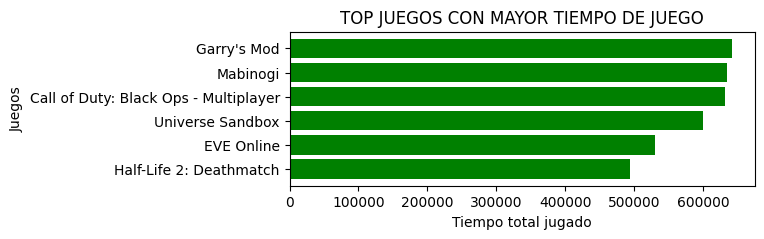

In [41]:
plt.figure(figsize=(6,2))

plt.barh(top_playtime['item_name'], top_playtime['playtime_forever'], color='green')
plt.xlabel('Tiempo total jugado')
plt.ylabel('Juegos')
plt.title('TOP JUEGOS CON MAYOR TIEMPO DE JUEGO')

plt.gca().invert_yaxis()
plt.show()

In [42]:
#--------------------------------------------------
# MES CON MAS JUEGOS
#--------------------------------------------------
df_steam_copy = df_steam.copy()
df_steam_copy['release_date'] = pd.to_datetime(df_steam_copy['release_date'], errors = 'coerce')

df_steam_copy['release_month'] = df_steam_copy['release_date'].dt.to_period('M')

count_month_games = df_steam_copy.groupby('release_month').size().reset_index(name='count_games')

print(count_month_games)

    release_month  count_games
0         1970-07            1
1         1970-12            1
2         1975-12            1
3         1980-01            1
4         1981-01            2
..            ...          ...
353       2018-12            6
354       2019-05            1
355       2019-09            1
356       2019-12            1
357       2021-12            1

[358 rows x 2 columns]


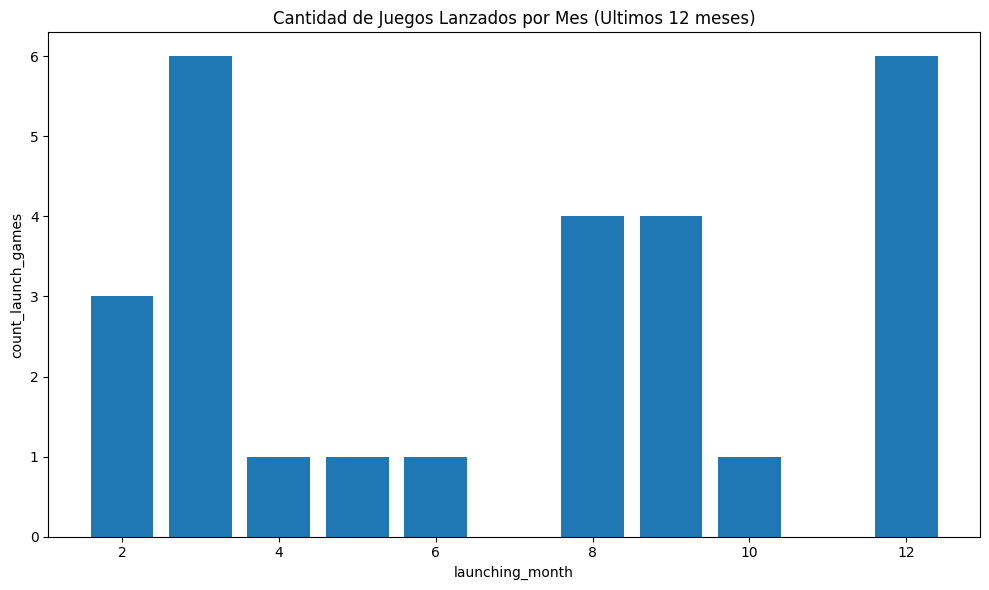

In [43]:
last_12_months = count_month_games[-12:]

plt.figure(figsize=(10,6))

months = last_12_months['release_month'].dt.month.astype(int)
count_games = last_12_months['count_games']

plt.bar(months, count_games)

plt.xlabel('launching_month')
plt.ylabel('count_launch_games')
plt.title('Cantidad de Juegos Lanzados por Mes (Ultimos 12 meses)')

plt.tight_layout()
plt.show()

In [44]:
d = df_steam_games.genres.dropna()
conteo = d.explode().value_counts()

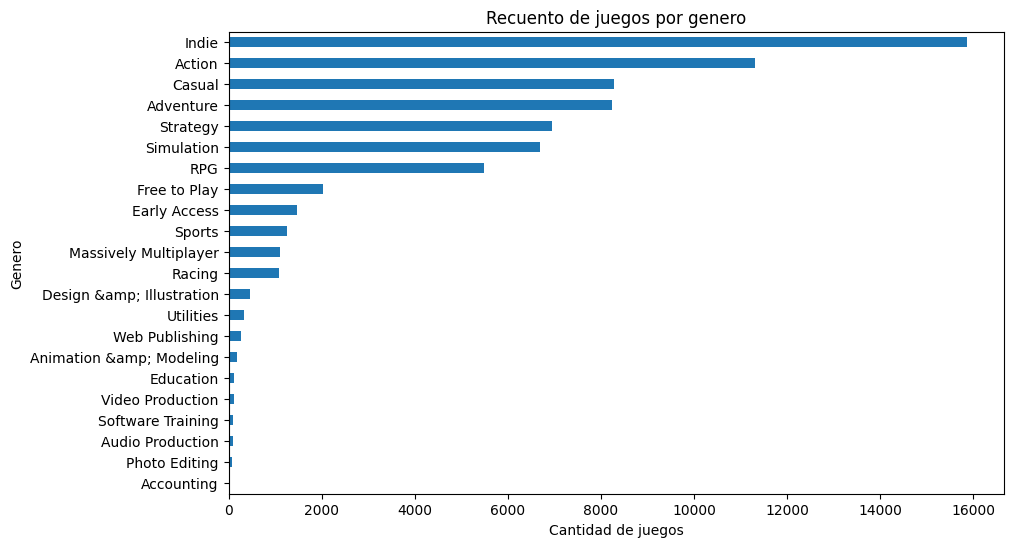

In [45]:
# Grafico
conteo = conteo.sort_values()

plt.figure(figsize=(10,6))
conteo.plot(kind = 'barh')
plt.title('Recuento de juegos por genero')
plt.xlabel('Cantidad de juegos')
plt.ylabel('Genero')
plt.show()

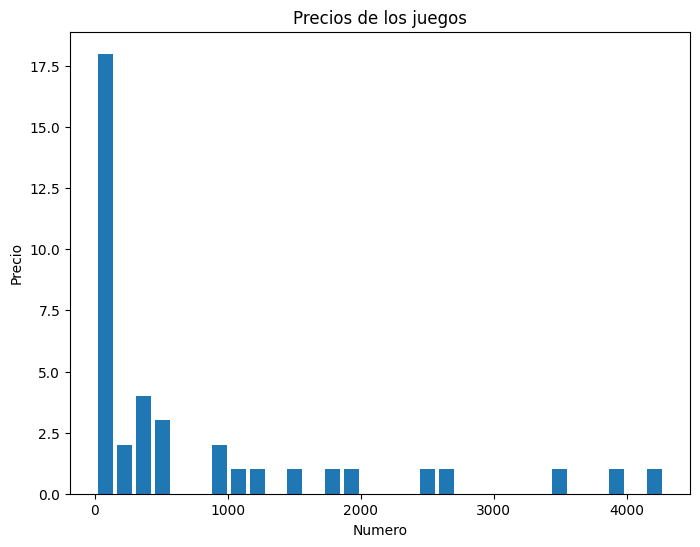

In [46]:
datos_price = df_steam_games.price.dropna()
price_count = datos_price.explode().value_counts()
price_count.sort_values()
price_count = price_count[price_count>10]

plt.figure(figsize=(8,6))
price_count.plot(kind = 'hist', rwidth= 0.8, bins = 30)
plt.title('Precios de los juegos')
plt.xlabel('Numero')
plt.ylabel('Precio')

plt.show()

In [47]:
tamaño_muestra = 100 
muestra_aleatoria = df_steam_games.sample(n=tamaño_muestra, random_state=42)

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

user_item_id = 10
target_game = muestra_aleatoria[muestra_aleatoria['id'] == user_item_id]

target_game_tags_and_genres = ' '.join(target_game['tags'].fillna('').astype(str) + ' ' + target_game['genres'].fillna('').astype(str))

tfidf_vectorizer = TfidfVectorizer()

muestra_aleatoria['tags_and_genres'] = muestra_aleatoria['tags'].fillna('').astype(str) + ' ' + muestra_aleatoria['genres'].fillna('').astype(str)
tfidf_matrix = tfidf_vectorizer.fit_transform([target_game_tags_and_genres] + muestra_aleatoria['tags_and_genres'].tolist())

similarity_matrix = cosine_similarity(tfidf_matrix)

similar_games_indices = similarity_matrix[0].argsort()[::-1]

num_recommendations = 5
recommended_games = muestra_aleatoria.reset_index(drop=True).loc[similar_games_indices[1:num_recommendations + 1]]

In [49]:
recommended_games.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer,tags_and_genres
36,Degica,[Utilities],DigiFish Aqua Real 2,DigiFish Aqua Real 2,http://store.steampowered.com/app/372060/DigiF...,2015-06-10,"[Utilities, Casual, Simulation]",http://steamcommunity.com/app/372060/reviews/?...,None,9.99,0.0,372060,Formosoft International,"['Utilities', 'Casual', 'Simulation'] ['Utilit..."
26,Northway Games,"[Indie, Simulation, Strategy]",Rebuild 3: Gangs of Deadsville,Rebuild 3: Gangs of Deadsville,http://store.steampowered.com/app/257170/Rebui...,2015-05-29,"[Strategy, Zombies, Simulation, Survival, Indi...",http://steamcommunity.com/app/257170/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",14.99,0.0,257170,"Northway Games,Sarah Northway","['Strategy', 'Zombies', 'Simulation', 'Surviva..."
27,Dovetail Games - Trains,[Simulation],Train Simulator: BR Class 73 'Gatwick Express'...,Train Simulator: BR Class 73 'Gatwick Express'...,http://store.steampowered.com/app/258659/Train...,2016-02-18,[Simulation],http://steamcommunity.com/app/258659/reviews/?...,"[Single-player, Downloadable Content, Steam Ac...",19.99,0.0,258659,Dovetail Games,['Simulation'] ['Simulation']
28,Dusenberry Martin Racing,[Racing],Paint Scheme Pack 1,Paint Scheme Pack 1,http://store.steampowered.com/app/525182/Paint...,2016-09-13,[Racing],http://steamcommunity.com/app/525182/reviews/?...,"[Single-player, Online Multi-Player, Downloada...",4.99,0.0,525182,Monster Games,['Racing'] ['Racing']
29,PolyDigital,"[Indie, Sports]",Bunny Hop League,Bunny Hop League,http://store.steampowered.com/app/429780/Bunny...,2017-04-27,"[Indie, Sports, Fast-Paced, Parkour, Multiplayer]",http://steamcommunity.com/app/429780/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",5.99,0.0,429780,PolyDigital,"['Indie', 'Sports', 'Fast-Paced', 'Parkour', '..."


In [50]:
from fastapi import FastAPI

In [51]:
app = FastAPI()

df_steam = pd.read_csv('./steam_games.csv')

@app.get('/recomendacion_juego/{product_id}')
async def recomendacion_juego(product_id: int):
    try:
        target_game = df_steam[df_steam['id']==product_id]

        if target_game.empty:
            return {'message': 'No se encontro el juego e referencia'}
        
        target_game_tags_and_genres = ' '.join(target_game['tags'].fillna('').astype(str) + ' ' + target_game['genres'].fillna('').astype(str))

        tfidf_vectorizer = TfidfVectorizer()

        chunk_size = 100
        similarity_scores = None

        for chunk in pd.read_csv('Data/steam_games.csv', chunksize=chunk_size):
            chunk_tags_and_genres = ' '.join(chunk['tags'].fillna('').astype(str) + ' ' + chunk['genres'].fillna('').astype(str))

            tfidf_matrix = tfidf_vectorizer.fit_transform([target_game_tags_and_genres, chunk_tags_and_genres])

            if similarity_scores is None:
                similarity_scores = cosine_similarity(tfidf_matrix)
            else:
                similarity_scores = cosine_similarity(tfidf_matrix, X=similarity_scores)

        if similarity_scores is not None:

            similar_games_indices = similarity_scores[0].argsort()[::-1]

            num_recommendations = 5
            recommended_games = df_steam.loc[similar_games_indices[1:num_recommendations + 1]]

            return recommended_games[['app_name', 'tags', 'genres']].to_dict(orient='records')

        return {'message': 'No se encontraron juegos similares'}

    except Exception as e:
        return {'message': f'Error: {str(e)}'}  


In [52]:
def userdata(user_id):
    user_reviews = df_reviews[df_reviews['user_id'] == user_id]

    game_ids = user_reviews['item_id'].unique()
    user_steam_games = df_steam[df_steam['id'].astype(int).isin(game_ids)]

    user_steam_games.loc[:, 'price'] = user_steam_games['price'].str.replace('$','').astype(float)
    money_spent = user_steam_games['price'].sum()

    user_reviews.loc[:,'recommend'] = user_reviews['recommend'].astype(bool)
    recommend_porcentage = user_reviews['recommend'].mean() * 100

    num_items = len(game_ids)

    user_data = {
        'money_spent': money_spent,
        'recommend_porcentage': recommend_porcentage,
        'num_items': num_items
    }

    return user_data


In [53]:
user_id = 'js41637'

resultado_usuario = userdata(user_id)

print('Cantidad de dinero gastado:', resultado_usuario['money_spent'])
print('Porcentaje de recomendacion:', resultado_usuario['recommend_porcentage'])
print('Cantidad de items:', resultado_usuario['num_items'])


Cantidad de dinero gastado: 29.979999999999997
Porcentaje de recomendacion: 100.0
Cantidad de items: 3


In [54]:
app = FastAPI()

@app.get('/userdata/{user_id}')
async def userdata(user_id: str):
    try:
        Cantidad = 0
        recommend_count = 0
        total_reviews = 0
        item_ids = set()

        chunk_size = 100000
        user_reviews_generator = pd.read_csv('./data/reviews.csv', chunksize= chunk_size)

        for chunk in user_reviews_generator:
            user_reviews = chunk[chunk['user_id']== user_id] 

            Cantidad += user_reviews.merge(df_steam[['id','price']], left_on='item_id', right_on='id', how='inner')['price'].sum()
            recommend_count += user_reviews['recommend'].sum()
            total_reviews += len(user_reviews)
            item_ids.update(user_reviews['item_id'].unique())

        if total_reviews > 0:
            porcentaje = (recommend_count/total_reviews) * 100
        else:
            porcentaje = 0

        items_count = len(item_ids)

        user_data = {
            'Cantidad de dinero gastado': Cantidad,
            'Recomendado Porcentaje': porcentaje,
            'Cantidad de items': items_count
        }

        return user_data
    
    except Exception as e:
        return {'message': f'Error: {str(e)}'}   

In [55]:
df_steam2 = pd.read_csv('./steam_games.csv')

@app.get("/recomendacion_juego/{product_id}")
async def recomendacion_juego(product_id: int):
    try:
        # Obtener el ID del juego
        target_game = df_steam2[df_steam2['id'] == product_id]

        if target_game.empty:
            return {"message": "No se encontró el juego de referencia."}

        # Combina las etiquetas (tags) y géneros en una sola cadena de texto
        target_game_tags_and_genres = ' '.join(target_game['tags'].fillna('').astype(str) + ' ' + target_game['genres'].fillna('').astype(str))

        # Crea un vectorizador TF-IDF
        tfidf_vectorizer = TfidfVectorizer()

        # Configura el tamaño del lote para la lectura de juegos
        chunk_size = 100  # Tamaño del lote (puedes ajustarlo según tus necesidades)
        similarity_scores = None

        # Procesa los juegos por lotes utilizando chunks
        for chunk in pd.read_csv('./Data/steam_games.csv', chunksize=chunk_size):
            # Combina las etiquetas (tags) y géneros de los juegos en una sola cadena de texto
            chunk_tags_and_genres = ' '.join(chunk['tags'].fillna('').astype(str) + ' ' + chunk['genres'].fillna('').astype(str))

            # Aplica el vectorizador TF-IDF al lote actual de juegos y al juego de referencia
            tfidf_matrix = tfidf_vectorizer.fit_transform([target_game_tags_and_genres, chunk_tags_and_genres])

            # Calcula la similitud entre el juego de referencia y los juegos del lote actual
            if similarity_scores is None:
                similarity_matrix = cosine_similarity(tfidf_matrix)
                similarity_scores = cosine_similarity(similarity_matrix, similarity_scores)
            else:
                similarity_matrix = cosine_similarity(tfidf_matrix)
                similarity_scores = cosine_similarity(similarity_matrix, similarity_scores)

        if similarity_scores is not None:
            # Obtiene los índices de los juegos más similares
            similar_games_indices = similarity_scores[0].argsort()[::-1]

            # Recomienda los juegos más similares (puedes ajustar el número de recomendaciones)
            num_recommendations = 5
            recommended_games = df_steam2.loc[similar_games_indices[1:num_recommendations + 1]]

            # Devuelve la lista de juegos recomendados
            return recommended_games[['app_name','id']].to_dict(orient='records')

        return {"message": "No se encontraron juegos similares"}

    except Exception as e:
        return {"message": f"Error: {str(e)}"}